# Faktor Apakah yang Menjual Sebuah Mobil?


Berdasarkan data iklan kendaraan gratis perusahaan Crankshaft List periode tahun 2018 - 2019 akan dilakukan analisa untuk menjawab pertanyaan apakah harga kendaraan dipengaruhi oleh faktor yang ditetapkan sebagai berikut :

   1. Jenis transmisi kendaraan (`transmission`).
   2. Warna kendaraan (`paint_color`).
   3. Umur kendaraan (`vehicle_age`).
   4. Jarak tempuh kendaraaan (`odometer`).
   5. Kondisi kendaraan (`condition`).

Dataset ini memiliki parameter inti sebagai berikut :

   1. Harga kendaraan (`price`).
   2. Umur kendaraan (`vehicle_age`).
   3. Jarak tempuh kendaraan (`odometer`).
   4. Jumlah silinder kendaraan (`cylinders`).
   5. Kondisi kendaraan (`condition`).

Dari parameter inti yang dimiliki dataset akan dilihat informasi apakah yang bisa didapatkan.

Langkah yang akan dilakukan dalam penelitian ini :
   1. Memeriksa duplikat eksplisit dataset.
   2. Memeriksa dan mengatasi nilai yang hilang.
   3. Memperbaiki tipe data.
   4. Memperbaiki kualitas data.
   5. Mempelajari parameter inti dengan dan tanpa outlier.
   6. Menentukan masa berlaku iklan.
   7. Menentukan tipe kendaraan terpopuler
   8. Memeriksa faktor pertanyaan utama.

Untuk menjawab pertanyaan utama akan dilihat dari 2 jenis kendaraan terpopuler yang diiklankan.


## Pra-pemrosesan

In [32]:
# Muat semua library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


### Memuat Data

In [33]:
# Muat file data menjadi DataFrame
try :
    df = pd.read_csv(r'C:\Users\vidop\Documents\Practicum\Sprint 3\vehicles_us.csv')

except :
    df = pd.read_csv('/datasets/vehicles_us.csv')



### Mengeksplorasi Data Awal

In [34]:
# tampilkan informasi/rangkuman umum tentang DataFrame
df.shape

(51525, 13)

In [35]:
# tampilkan sampel data
df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28


Dataset asli memiliki 51525 baris dan 13 kolom. Dari sample data, beberapa kolom memiliki nilai yang hilang.

Dataset memiliki kolom berisi informasi sebagai berikut :

- **`price`** : Harga jual kendaraan.
- **`model_year`** : Tahun pembuatan kendaraan.
- **`model`** : Merek dan model kendaraan.
- **`condition`** : Kondisi kendaraan.
- **`cylinders`** : Jumlah silinder mesin kendaraan.
- **`fuel`** : Jenis bahan bakar kendaraan.
- **`odometer`** : Jarak tempuh kendaraan saat iklan ditayangkan.
- **`type`** : Jenis kendaraan.
- **`transmission`** :Jenis transmisi kendaraan.
- **`paint_color`** : Warna kendaraan.
- **`is_4wd`** : Apakah kendaraan memiliki penggerak 4 roda.
- **`date_posted`** : Tanggal iklan ditayangkan. 
- **`days_listed`** : Jumlah hari iklan ditayangkan hingga dihapus.

In [36]:
# Informasi umum dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


Kolom **date_posted** memiliki tipe data yang tidak sesuai.

Selain itu beberapa kolom memiliki jumlah baris yang lebih sedikit dari total baris dataset.

In [37]:
# Cek jumlah baris nilai yang hilang
df.isna().sum()

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

Terdapat beberapa kolom yang memiliki nilai yang hilang. Kolom **is_4wd** memiliki paling banyak nilai yang hilang.

In [38]:
# Cek duplikat eksplisit
df.duplicated().sum()

0

Tidak terdapat duplikat eksplisit dalam dataset.

In [39]:
# Informasi umum kolom numerik dataset
df.describe()

,price,model_year,cylinders,odometer,is_4wd,days_listed
count,51525.000000,47906.000000,46265.000000,43633.000000,25572.0,51525.00000
mean,12132.464920,2009.750470,6.125235,115553.461738,1.0,39.55476
std,10040.803015,6.282065,1.660360,65094.611341,0.0,28.20427
min,1.000000,1908.000000,3.000000,0.000000,1.0,0.00000
25%,5000.000000,2006.000000,4.000000,70000.000000,1.0,19.00000
50%,9000.000000,2011.000000,6.000000,113000.000000,1.0,33.00000
75%,16839.000000,2014.000000,8.000000,155000.000000,1.0,53.00000
max,375000.000000,2019.000000,12.000000,990000.000000,1.0,271.00000


### Kesimpulan dan Langkah-Langkah Selanjutnya

Dataset ini memiliki 51525 baris dan 13 kolom, dimana setiap barisnya memiliki informasi tentang kendaraan yang dijual. Beberapa kolom memiliki informasi terkait dengan waktu iklan kendaraan : tanggal iklan ditayangkan (date_posted) dan lama iklan ditayangkan (days_listed). Sisanya merupakan informasi terkait kendaraan yang dijual. 

Dataset ini tidak memiliki data duplikat. Di beberapa kolomny memiliki nilai yang hilang dan ada satu kolom dimana tipe datanya tidak sesuai.

Langkah selanjutnya akan dilakukan perbaikan pada data dalam kolom yang bermasalah.


## Mengatasi Nilai-Nilai yang Hilang (Jika Ada)

Dataset memiliki 5 kolom yang mempunyai nilai yang hilang :

   1. **model_year**
   2. **cylinders**
   3. **odometer**
   4. **paint_color**
   5. **is_4wd**

**Memperbaiki nilai yang hilang pada kolom `model year` :**

In [40]:
mdy = df[df['model_year'].isna()]['price'].count() / df['price'].count()
print(f"Persentase baris data model year yang hilang {mdy:.2%}")

Persentase baris data model year yang hilang 7.02%


In [41]:
df['model_year'].describe()

count    47906.000000
mean      2009.750470
std          6.282065
min       1908.000000
25%       2006.000000
50%       2011.000000
75%       2014.000000
max       2019.000000
Name: model_year, dtype: float64

Data di kolom **model_year** memiliki outlier yang tinggi, nilai min : 1908 dan max : 2019. Untuk mengisi nilai yang hilang di kolom ini digunakan nilai median.

In [42]:
# Median model_year per type
mdytype = df.groupby('type')['model_year'].median()

# Fungsi mengganti nilai yang hilang
def change_model_year(row):
    types = row['type']
    return mdytype[types]

# Aplikasi ke kolom baru
df['mdy_change'] = df[(df['model_year'].isnull())].apply(change_model_year, axis=1)


In [43]:
# Aplikasi ke kolom model_year
df['model_year'] = df['model_year'].fillna(df['mdy_change'])

In [44]:
# Cek jumlah baris nilai yang hilang di kolom model_year 
df['model_year'].isna().sum()

0

**Memperbaiki nilai yang hilang pada kolom `cylinders` :**

In [45]:
cyl = df[df['cylinders'].isna()]['price'].count() / df['price'].count()
print(f"Persentase baris data cylinders yang hilang {cyl:.2%}")

Persentase baris data cylinders yang hilang 10.21%


In [46]:
df['cylinders'].describe()

count    46265.000000
mean         6.125235
std          1.660360
min          3.000000
25%          4.000000
50%          6.000000
75%          8.000000
max         12.000000
Name: cylinders, dtype: float64

Data di kolom **cylinders** memiliki outlier yang tinggi, nilai min : 3 dan max : 12. Untuk mengisi nilai yang hilang di kolom ini digunakan nilai median.

In [47]:
# Median cylinders per type
cyltype = df.groupby('type')['cylinders'].median()

# Fungsi mengganti nilai yang hilang
def change_cylinders(row):
    types = row['type']
    return cyltype[types]

# Aplikasi ke kolom baru
df['cyl_change'] = df[(df['cylinders'].isnull())].apply(change_cylinders, axis=1)


In [48]:
# Aplikasi ke kolom cylinders
df['cylinders'] = df['cylinders'].fillna(df['cyl_change'])

In [49]:
# Cek jumlah baris nilai yang hilang di kolom cylinders
df['cylinders'].isna().sum()

0

**Memperbaiki nilai yang hilang pada kolom `odometer` :**

In [50]:
odm = df[df['odometer'].isna()]['price'].count() / df['price'].count()
print(f"Persentase baris data odometer yang hilang {odm:.2%}")

Persentase baris data odometer yang hilang 15.32%


In [51]:
df['odometer'].describe()

count     43633.000000
mean     115553.461738
std       65094.611341
min           0.000000
25%       70000.000000
50%      113000.000000
75%      155000.000000
max      990000.000000
Name: odometer, dtype: float64

In [52]:
# Cek kondisi kendaraan dengan nilai odometer yang hilang
df[df['odometer'].isna()].groupby('condition')['price'].count()

condition
excellent    3800
fair          237
good         3092
like new      728
new            18
salvage        17
Name: price, dtype: int64

Data di kolom **odometer** memiliki outlier yang tinggi, nilai min : 0 dan max : 990000 dan hanya sedikit data kendaraan dengan kondisi baru (new) di dalam data nilai yang hilang. Untuk mengisi nilai yang hilang di kolom ini digunakan nilai median. Ada kendaraan yang ber odometer 0 di dalam dataset, kemungkinan kendaraan baru yang di iklan kan.

In [53]:
# Cek tahun pembuatan kendaraan odometer 0
df.query('odometer ==0').groupby('model_year')['price'].count().tail(5)

model_year
2014.0    11
2015.0    16
2016.0     7
2017.0    12
2018.0     3
Name: price, dtype: int64

In [54]:
# Cek kondisi kendaraan odometer 0
df.query('odometer ==0').groupby('condition')['price'].count().tail(5)

condition
excellent     69
fair           6
good         104
like new       4
salvage        2
Name: price, dtype: int64

Setelah di cek, kendaraan yang memiliki odometer 0 bukan kendaraan baru dan banyak jumlah kendaraan yang dibuat dibawah tahun 2018. Kemungkinan hal ini terjadi karena di isi dengan nilai 0 oleh pengiklan kendaraan tersebut.

In [55]:
# Median by type
df.groupby('type')['odometer'].median()

type
SUV            118865.0
bus            109705.0
convertible     76000.0
coupe           63070.0
hatchback      111507.0
mini-van       126350.0
offroad        112723.0
other          106900.0
pickup         118622.0
sedan          105000.0
truck          120000.0
van            123362.0
wagon          121467.0
Name: odometer, dtype: float64

In [56]:
# Median by condition
df.groupby('condition')['odometer'].median().sort_values()

condition
new            8002.0
like new      72982.5
excellent    104230.0
good         129000.0
salvage      142673.5
fair         181613.0
Name: odometer, dtype: float64

Nilai median odometer per jenis kendaraan merupakan nilai tengah yang diambil dari berbagai kondisi dalam satu tipe kendaraan.

Sedangkan nilai median odometer per kondisi kendaraan merupakan nilai tengah yang diambil dari berbagai jenis kendaraan di dalam satu kondisi.

Setelah dibandingkan, nilai median per kondisi lebih mencerminkan nilai odometer yang seharusnya. Hal ini terlihat dari nilai median odometer yang meningkat pada setiap penurunan kondisi kendaraan. Sehingga untuk mengisi nilai yang hilang pada kolom odometer akan digunakan nilai median per kondisi kendaraan.





In [57]:
# Median odometer per condition
odotype = df.groupby('condition')['odometer'].median()

# Fungsi mengganti nilai yang hilang
def change_odometer(row):
    types = row['condition']
    return odotype[types]

# Aplikasi ke kolom baru
df['odo_change'] = df[(df['odometer'].isnull())].apply(change_odometer, axis=1)


In [58]:
# Aplikasi ke kolom odometer
df['odometer'] = df['odometer'].fillna(df['odo_change'])

In [59]:
# Cek jumlah baris nilai yang hilang di kolom odometer
df['odometer'].isna().sum()

0

**Memperbaiki nilai yang hilang pada kolom `paint_color` :**

In [60]:
pnt = df[df['paint_color'].isna()]['price'].count() / df['price'].count()
print(f"Persentase baris data paint color yang hilang {pnt:.2%}")

Persentase baris data paint color yang hilang 17.99%


In [61]:
df.value_counts('paint_color', dropna=False)

paint_color
white     10029
NaN        9267
black      7692
silver     6244
grey       5037
blue       4475
red        4421
green      1396
brown      1223
custom     1153
yellow      255
orange      231
purple      102
dtype: int64

Jika dilihat dari sebaran data warna kendaraan (paint_color), jumlah nilai yang hilang tinggi sekali. Kemungkinan warna kendaraan ini juga tidak di isi oleh pengiklan kendaraan. Nilai yang hilang ini akan di isi dengan warna custom.

In [62]:
# isi nilai yang hilang kolom paint_color
df['paint_color'] = df['paint_color'].fillna('custom')

In [63]:
# cek sebaran data kolom paint_color
df.value_counts('paint_color', dropna=False)

paint_color
custom    10420
white     10029
black      7692
silver     6244
grey       5037
blue       4475
red        4421
green      1396
brown      1223
yellow      255
orange      231
purple      102
dtype: int64

In [64]:
# Cek jumlah baris nilai yang hilang di kolom paint_color
df['paint_color'].isna().sum()

0

**Memperbaiki nilai yang hilang pada kolom `is_4wd` :**

In [65]:
wd = df[df['is_4wd'].isna()]['price'].count() / df['price'].count()
print(f"Persentase baris data model year yang hilang {wd:.2%}")

Persentase baris data model year yang hilang 50.37%


In [66]:
# cek sebaran data kolom is_4wd
df.value_counts('is_4wd', dropna=False)

is_4wd
NaN    25953
1.0    25572
dtype: int64

Deskripsi kolom **is_4wd** sendiri adalah apakah kendaraan memiliki penggerak 4 roda atau tidak. 

Nilai 1 merupakan kendaraan yang memiliki penggerak 4 roda dan nilai NaN kendaraaan yang tidak.

Nilai NaN di kolom ini akan diganti dengan nilai 0.

In [67]:
# isi nilai yang hilang kolom is_4wd
df['is_4wd'] = df['is_4wd'].fillna(0)

In [68]:
# cek sebaran data kolom is_4wd
df.value_counts('is_4wd', dropna=False)

is_4wd
0.0    25953
1.0    25572
dtype: int64

**Rangkuman perbaikan nilai yang hilang**

In [69]:
# Cek perubahan dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    51525 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     51525 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      51525 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   51525 non-null  object 
 10  is_4wd        51525 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
 13  mdy_change    3619 non-null   float64
 14  cyl_change    5260 non-null   float64
 15  odo_change    7892 non-null   float64
dtypes: float64(7), int64(2), object(7)
memory usage: 6.3+ MB


Terdapat perubahan nilai yang hilang pada kolom di dataset :

   1. **model_year** : 7.02% Baris data nilai yang hilang di isi dengan nilai median tahun pembuatan per tipe kendaraan.
   2. **cylinders** : 10.21 % Baris data nilai yang hilang di isi dengan nilai median silinder per tipe kendaraan.
   3. **odometer** : 15.32% Baris data nilai yang hilang di isi dengan nilai median odometer per kondisi kendaran.
   4. **paint_color** : 18% Baris data nilai yang hilang di isi dengan warna custom.
   5. **is_4wd** : 50.37% Baris data nilai yang hilang di isi dengan nilai 0.

Kemungkinan adanya nilai yang hilang pada kolom **model_year, cylinders, odometer, paint_color** karena tidak di isi oleh pengiklan kendaraan.

## Memperbaiki Tipe Data

In [70]:
# Rubah tipe kolom date_posted ke datetime
df['date_posted']= pd.to_datetime(df['date_posted'], format='%Y-%m-%d %H:%M:%S')

In [71]:
# Rubah tipe kolom is_4wd ke bool
df['is_4wd'] = df['is_4wd'].astype('bool')

In [72]:
# Cek perubahan tipe data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51525 non-null  int64         
 1   model_year    51525 non-null  float64       
 2   model         51525 non-null  object        
 3   condition     51525 non-null  object        
 4   cylinders     51525 non-null  float64       
 5   fuel          51525 non-null  object        
 6   odometer      51525 non-null  float64       
 7   transmission  51525 non-null  object        
 8   type          51525 non-null  object        
 9   paint_color   51525 non-null  object        
 10  is_4wd        51525 non-null  bool          
 11  date_posted   51525 non-null  datetime64[ns]
 12  days_listed   51525 non-null  int64         
 13  mdy_change    3619 non-null   float64       
 14  cyl_change    5260 non-null   float64       
 15  odo_change    7892 non-null   float6

Perbaikan tipe data pada kolom **date_posted** dari object menjadi datetime.

## Memperbaiki Kualitas Data

In [73]:
# Tambahkan nilai waktu dan tanggal pada saat iklan ditayangkan 
df['year_posted'] = pd.DatetimeIndex(df['date_posted']).year
df['month_posted'] = pd.DatetimeIndex(df['date_posted']).month
df['day_of_week_posted'] = pd.DatetimeIndex(df['date_posted']).dayofweek

In [74]:
# Tambahkan usia kendaraan saat iklan ditayangkan
df['vehicle_age'] = df['year_posted'] - df['model_year'] +1

Usia kendaraan ditambahkan 1 untuk membulatkan pemakaian dibawah 1 tahun

In [75]:
# Tambahkan jarak tempuh rata-rata kendaraan per tahun 
df['avg_odometer_yearly'] = df['odometer'] / df['vehicle_age']

**Mengganti nilai pada kolom `condition`**

In [76]:
# Sebaran data kolom condition
df.value_counts('condition')

condition
excellent    24773
good         20145
like new      4742
fair          1607
new            143
salvage        115
dtype: int64

In [77]:
# Fungsi pengelompokkan condition
def condition_grouping(row) :
    condition = row['condition']
    if condition == 'salvage':
        return 0
    if condition == 'fair':
        return 1
    if condition == 'good':
        return 2
    if condition == 'excellent':
        return 3
    if condition == 'like new':
        return 4
    if condition == 'new':
        return 5
    

In [78]:
# Ganti nilai kolom condition
df['condition'] = df.apply(condition_grouping, axis=1)

In [79]:
# Cek perubahan nilai kolom condition
df.value_counts('condition')

condition
3    24773
2    20145
4     4742
1     1607
5      143
0      115
dtype: int64

Perubahan nilai pada kolom condition :

    0 = salvage
    1 = fair
    2 = good
    3 = excellent
    4 = like new
    5 = new
    

## Memeriksa Data yang Sudah Bersih

In [80]:
# tampilkan informasi/rangkuman umum tentang DataFrame
df.describe()

,price,model_year,condition,cylinders,odometer,days_listed,mdy_change,cyl_change,odo_change,year_posted,month_posted,day_of_week_posted,vehicle_age,avg_odometer_yearly
count,51525.000000,51525.000000,51525.000000,51525.000000,51525.000000,51525.00000,3619.000000,5260.000000,7892.000000,51525.000000,51525.000000,51525.000000,51525.000000,51525.000000
mean,12132.464920,2009.832838,2.637535,6.130810,115199.014508,39.55476,2010.923183,6.179848,113239.359668,2018.307462,6.628491,3.005434,9.474624,15388.023861
std,10040.803015,6.070630,0.712447,1.658414,60484.863376,28.20427,1.000849,1.640537,21294.844016,0.461447,3.474134,1.997759,6.084510,11750.914630
min,1.000000,1908.000000,0.000000,3.000000,0.000000,0.00000,2004.000000,4.000000,8002.000000,2018.000000,1.000000,0.000000,1.000000,0.000000
25%,5000.000000,2007.000000,2.000000,4.000000,75668.000000,19.00000,2010.000000,4.000000,104230.000000,2018.000000,3.000000,1.000000,5.000000,9382.133333
50%,9000.000000,2011.000000,3.000000,6.000000,110908.000000,33.00000,2011.000000,6.000000,104230.000000,2018.000000,7.000000,3.000000,8.000000,13087.333333
75%,16839.000000,2014.000000,3.000000,8.000000,147821.000000,53.00000,2012.000000,8.000000,129000.000000,2019.000000,10.000000,5.000000,13.000000,18245.625000
max,375000.000000,2019.000000,5.000000,12.000000,990000.000000,271.00000,2012.000000,10.000000,181613.000000,2019.000000,12.000000,6.000000,111.000000,373200.000000


In [81]:
# tampilkan sampel data 
df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,...,date_posted,days_listed,mdy_change,cyl_change,odo_change,year_posted,month_posted,day_of_week_posted,vehicle_age,avg_odometer_yearly
0,9400,2011.0,bmw x5,2,6.0,gas,145000.0,automatic,SUV,custom,...,2018-06-23,19,NaN,NaN,NaN,2018,6,5,8.0,18125.000000
1,25500,2011.0,ford f-150,2,6.0,gas,88705.0,automatic,pickup,white,...,2018-10-19,50,2011.0,NaN,NaN,2018,10,4,8.0,11088.125000
2,5500,2013.0,hyundai sonata,4,4.0,gas,110000.0,automatic,sedan,red,...,2019-02-07,79,NaN,NaN,NaN,2019,2,3,7.0,15714.285714
3,1500,2003.0,ford f-150,1,8.0,gas,181613.0,automatic,pickup,custom,...,2019-03-22,9,NaN,NaN,181613.0,2019,3,4,17.0,10683.117647
4,14900,2017.0,chrysler 200,3,4.0,gas,80903.0,automatic,sedan,black,...,2019-04-02,28,NaN,NaN,NaN,2019,4,1,3.0,26967.666667


## Mempelajari Parameter Inti 

In [82]:
# Fungsi grafik histogram

def histogram(name) :
    df.hist(name, bins=100)
    plt.ylabel('count')
    plt.xlabel(name)


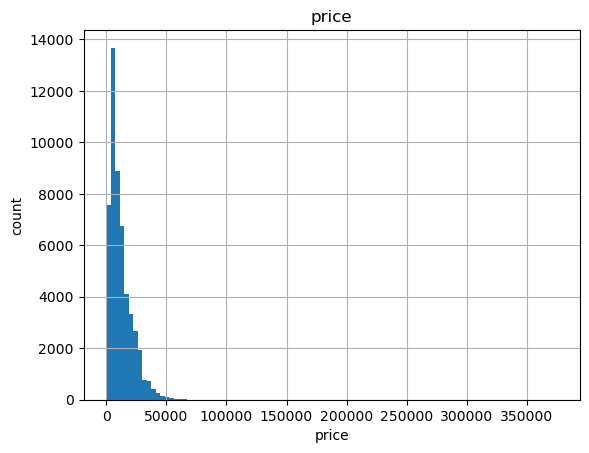

In [83]:
# Grafik histogram price
histogram('price')

Sebagian besar kendaraan diiklankan dengan rentang harga 1 - 50000.

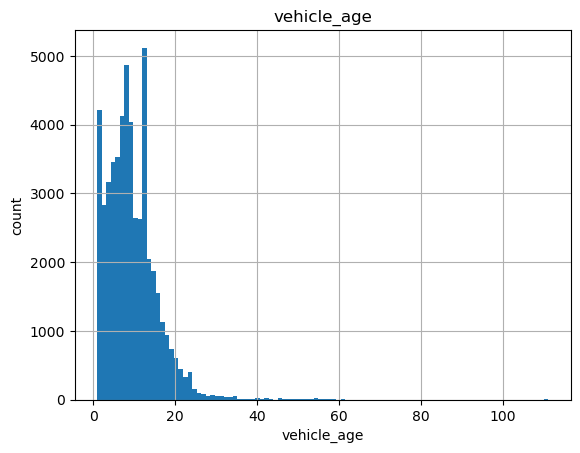

In [84]:
# Grafik histogram vehicle_age
histogram('vehicle_age')

Sebagian besar kendaraan yang diiklankan memiliki rentang umur 1 - 20 tahun

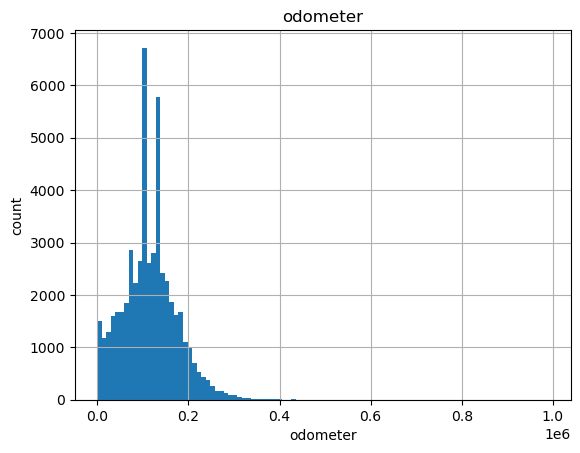

In [85]:
# Grafik histogram odometer
histogram('odometer')

Sebagian besar kendaraan yang diiklankan memiliki rentang jarak tempuh 0 - 200000. 

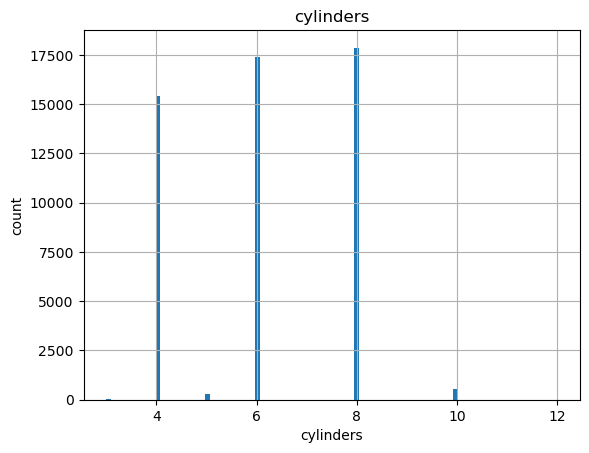

In [86]:
# Grafik histogram cylinders
histogram('cylinders')

Kendaraan yang paling banyak diiklankan memiliki jumlah silinder 4, 6 dan 8.

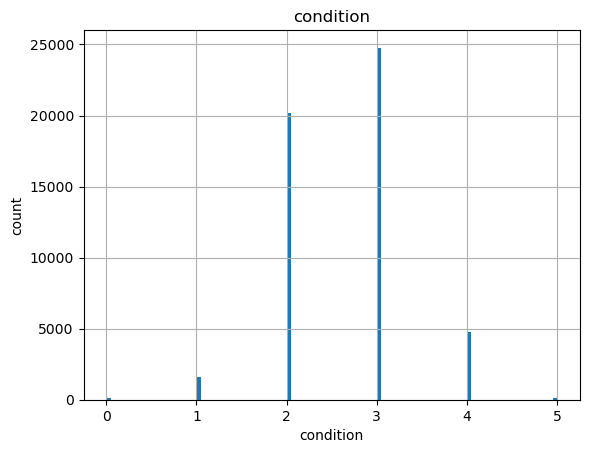

In [87]:
# Grafik histogram condition
histogram('condition')

Kendaraan yang paling banyak diiklankan dengan kondisi 2 (good) dan 3 (excellent).

## Mempelajari dan Menangani Outlier

Setelah melihat grafik dari sebaran data pada parameter inti, terdapat beberapa parameter yang memiliki outlier yaitu :

   1. **price** terdapat rentang harga diatas 40000-100000.
   2. **vehicle_age** terdapat rentang umur diatas 40-100 tahun.
   3. **odometer** terdapat rentang jarak tempuh diatas 400000.

In [88]:
# Fungsi batas bawah outlier
def lower_bound(name):
    Q1 = df[name].quantile(.25)
    Q3 = df[name].quantile(.75)
    IQR = Q3 - Q1
    return Q1 - 1.5*IQR

In [89]:
# Tentukan batas bawah outlier
price_lower_bound = lower_bound('price')
age_lower_bound = lower_bound('vehicle_age')
odo_lower_bound = lower_bound('odometer')

print('Batas bawah price adalah ', price_lower_bound)
print('Batas bawah age adalah ', age_lower_bound)
print('Batas bawah odometer adalah ', odo_lower_bound)

Batas bawah price adalah  -12758.5
Batas bawah age adalah  -7.0
Batas bawah odometer adalah  -32561.5


In [90]:
# Fungsi batas atas outlier
def upper_bound(name):
    Q1 = df[name].quantile(.25)
    Q3 = df[name].quantile(.75)
    IQR = Q3 - Q1
    return Q3 + 1.5*IQR

In [91]:
# Tentukan batas atas outlier 
price_upper_bound = upper_bound('price')
age_upper_bound = upper_bound('vehicle_age')
odo_upper_bound = upper_bound('odometer')

print('Batas atas price adalah ', price_upper_bound)
print('Batas atas age adalah ', age_upper_bound)
print('Batas atas odometer adalah ', odo_upper_bound)

Batas atas price adalah  34597.5
Batas atas age adalah  25.0
Batas atas odometer adalah  256050.5


In [92]:
# Simpan data tanpa outlier dalam DataFrame yang terpisah
df_filter1 = df.query('@price_lower_bound < price < @price_upper_bound')
df_filter2 = df_filter1.query('@age_lower_bound < vehicle_age < @age_upper_bound')
df_final = df_filter2.query('@odo_lower_bound < odometer < @odo_upper_bound')

In [93]:
print('Jumlah baris data berubah menjadi', df_final['price'].count(), 'baris atau',
      round(df_final['price'].count() / df['price'].count() * 100, 2),'% dari dataset asli.')

Jumlah baris data berubah menjadi 48149 baris atau 93.45 % dari dataset asli.


## Mempelajari Parameter Inti Tanpa Outlier

In [94]:
# Fungsi grafik histogram df_final

def histograms(name) :
    df_final.hist(name, bins=100)
    plt.ylabel('count')
    plt.xlabel(name)


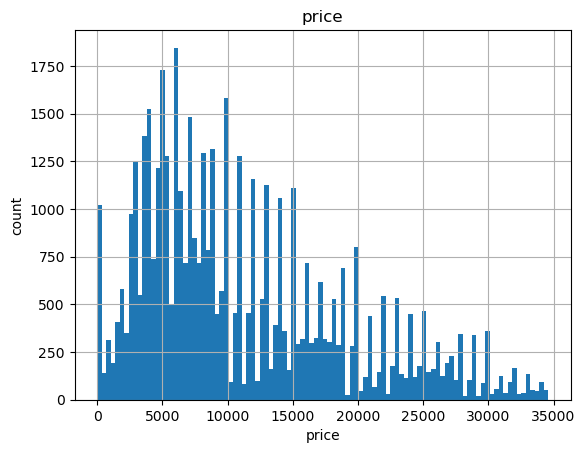

In [95]:
# Grafik histogram price
histograms('price')

Iklan paling banyak pada kendaraan dengan rentang harga 5000-10000.

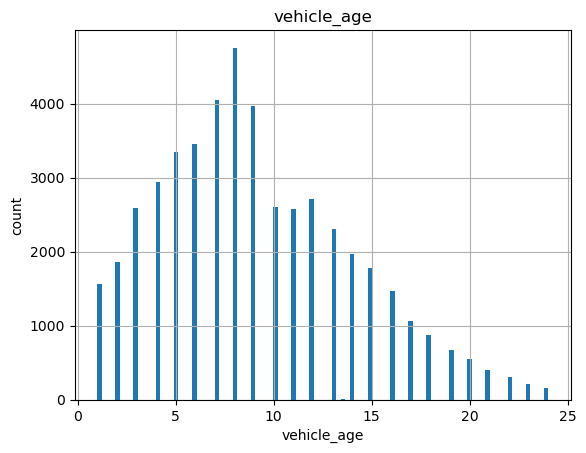

In [96]:
# Grafik histogram vehicle_age
histograms('vehicle_age')

Iklan paling banyak pada kendaraan dengan rentang umur 5 - 10 tahun.

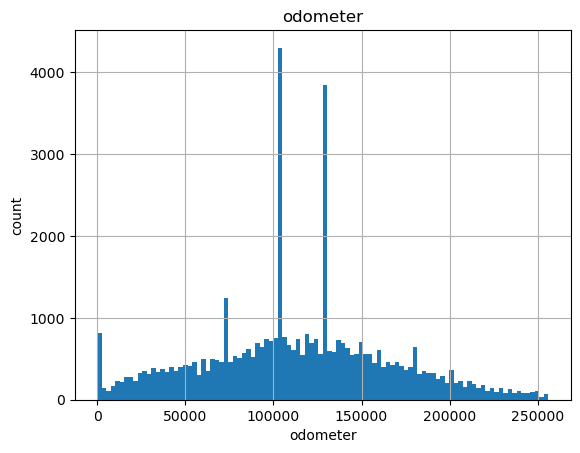

In [97]:
# Grafik histogram odometer
histograms('odometer')

Iklan paling banyak pada kendaraan yang memiliki rentang jarak tempuh 100000 - 150000.

## Masa Berlaku Iklan 

Text(0.5, 0, 'days')

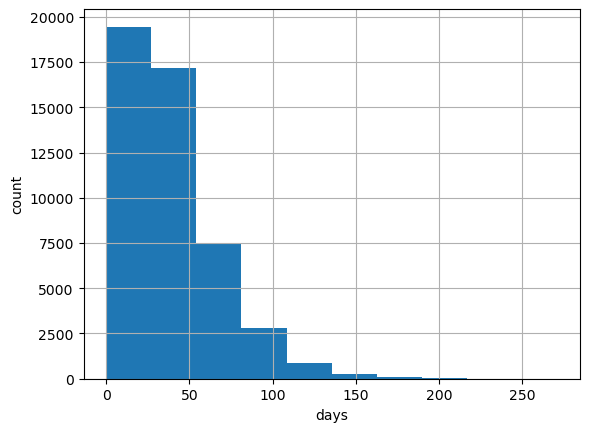

In [98]:
# grafik histogram days_listed
df_final['days_listed'].hist()
plt.ylabel('count')
plt.xlabel('days')

In [99]:
print('Rata - rata lama iklan ditayangkan adalah', round(df_final['days_listed'].mean()), 'hari.')
print('Median lama iklan ditayangkan adalah', round(df_final['days_listed'].median()), 'hari.')

Rata - rata lama iklan ditayangkan adalah 40 hari.
Median lama iklan ditayangkan adalah 33 hari.


Iklan yang dihapus dengan cepat dibawah 40 hari dan iklan yang lama ditayangkan diatas 40 hari.

## Harga Rata-Rata Setiap Jenis Kendaraan

             count     avg_price
type                            
sedan        11999   6984.555130
SUV          11864  10475.172960
truck        11036  15189.795759
pickup        6240  15127.550000
coupe         2010  13548.858706
wagon         1500   8996.340667
mini-van      1141   8072.185802
hatchback     1004   6842.271912
van            578   8889.480969
convertible    341  13046.598240
other          233  10542.137339
offroad        182  14344.049451
bus             21  18107.428571


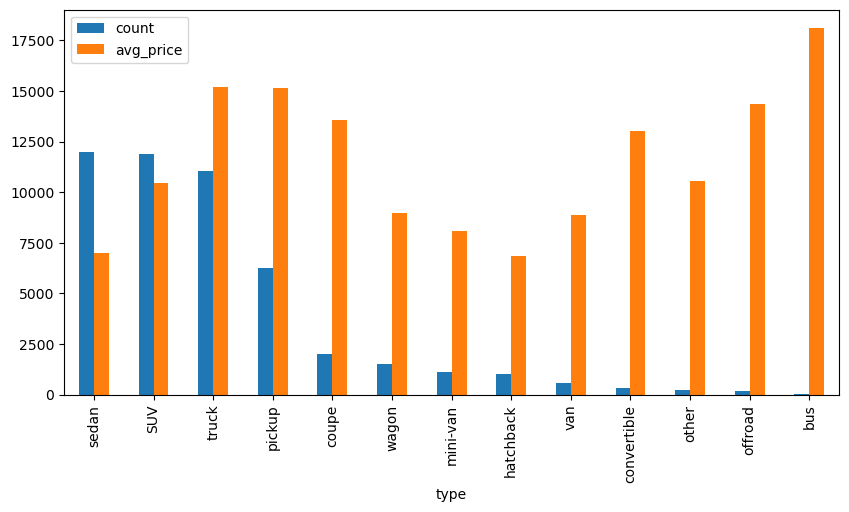

In [100]:
# Harga rata rata dan proporsi jumlah iklan dari iklan yang dihapus dengan cepat
vehicle_avg_price = df_final.pivot_table(index='type', values='price', aggfunc=['count','mean'])
vehicle_avg_price.columns = ['count', 'avg_price']
vehicle_avg_price.sort_values(by='count', ascending=False).plot(y=['count', 'avg_price'], kind='bar', figsize=(10,5) )
print(vehicle_avg_price.sort_values(by='count', ascending=False))

Terdapat 2 jenis kendaraan paling populer diiklankan dengan urutan :

 1. **Sedan** dengan rata rata harga 6984.
 2. **SUV** dengan rata rata harga 10475.

## Faktor Harga

In [101]:
# Cek jumlah baris 2 tipe kendaraan populer
popular_type = ['sedan', 'SUV']
df_final[df_final['type'].isin(popular_type)].value_counts('type')

type
sedan    11999
SUV      11864
dtype: int64

Jumlah baris tipe kendaraan populer diatas 50.

In [102]:
# Fungsi grafik boxplot variabel kategorik

def boxplot(typ):
    categoric_variable = ['transmission', 'paint_color']
    data = df_final.query('type == @typ')
    for i in categoric_variable:
        data.boxplot(column='price', by=i, showmeans=True)
        plt.ylabel('price')

In [103]:
# Fungsi grafik scatterplot variabel numerik

def scatterplot(typ, name):
    data = df_final.query('type == @typ')
    corr = data[name].corr(data['price'])
    print('nilai korelasi', corr)
    data.plot(x=name, y='price', kind='scatter', alpha=0.2)
    plt.title(typ)

**Analisa faktor harga pada tipe kendaraan `sedan`**

 **1.Korelasi variabel kategorik kolom `transmission` dan `paint_color`.**

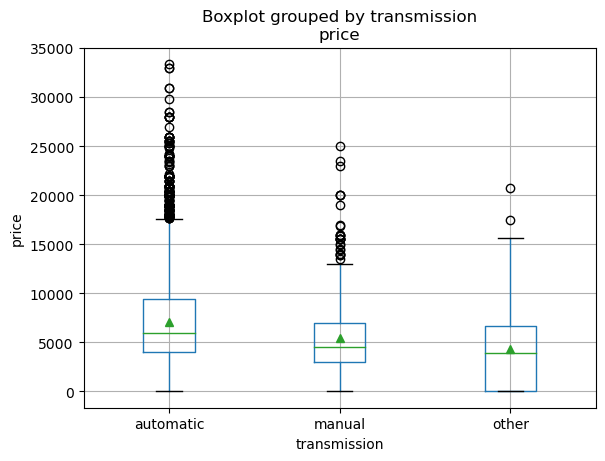

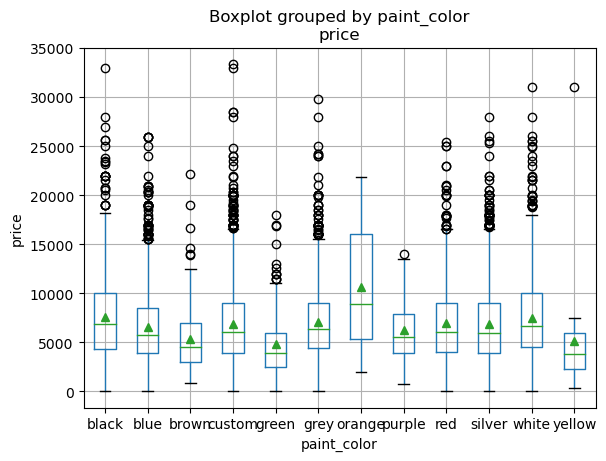

In [104]:
boxplot('sedan')

Untuk variabel kategorik **`transmission`** dan **`paint_color`** memiliki korelasi lemah terhadap **`price`** (harga).

**2. Korelasi variabel numerik kolom `vehicle_age`.**

nilai korelasi -0.6133753985075104


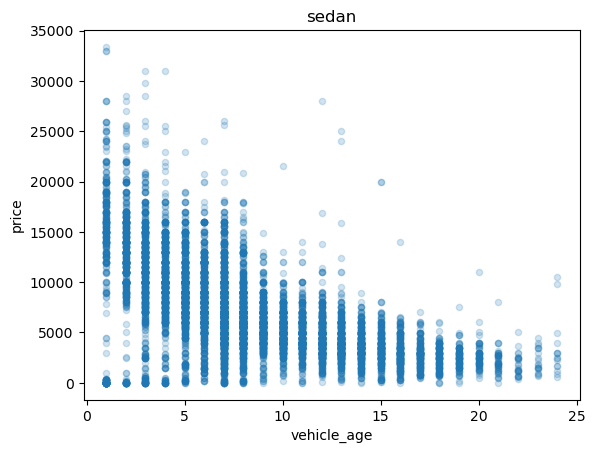

In [105]:
scatterplot('sedan','vehicle_age')

Pada umur kendaraan (`vehicle_age`) memiliki korelasi negatif terhadap harga (`price`)

**3. Korelasi variabel numerik kolom `odometer`.**

nilai korelasi -0.5188724446425387


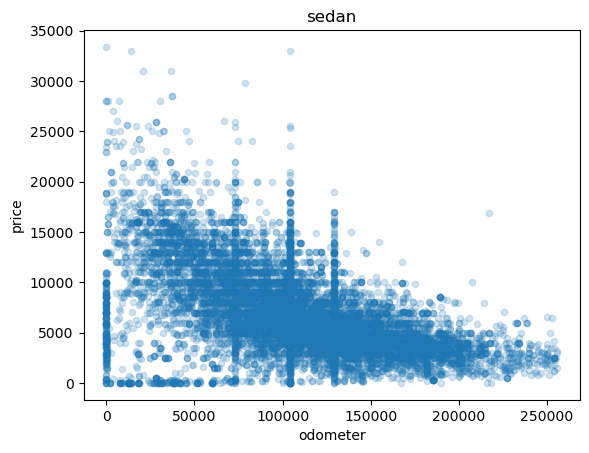

In [106]:
scatterplot('sedan','odometer')

Pada jarak tempuh kendaraan (`odometer`) memiliki korelasi negatif terhadap harga (`price`)

**4. Korelasi variabel numerik kolom `condition`.**

nilai korelasi 0.29224221127730604


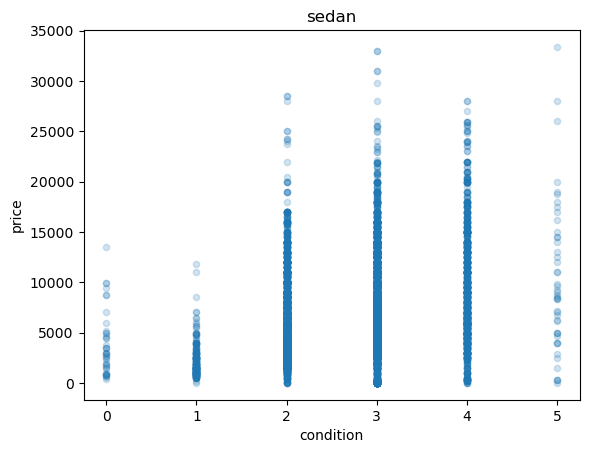

In [107]:
scatterplot('sedan','condition')

Pada kondisi kendaraan (`condition`) memiliki korelasi lemah positif terhadap harga (`price`)

**Analisa faktor harga pada tipe kendaraan `SUV`**

 **1.Korelasi variabel kategorik kolom `transmission` dan `paint_color`.**

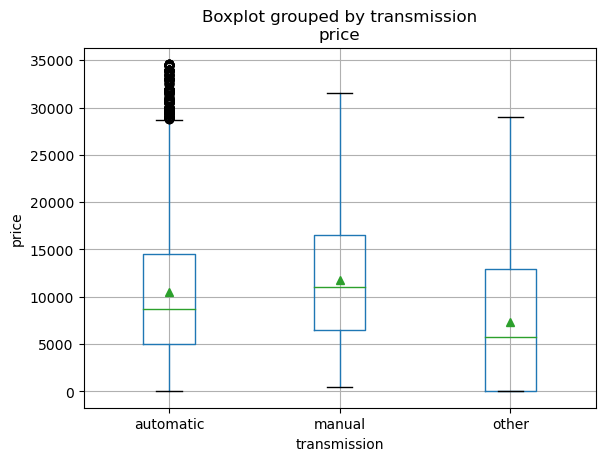

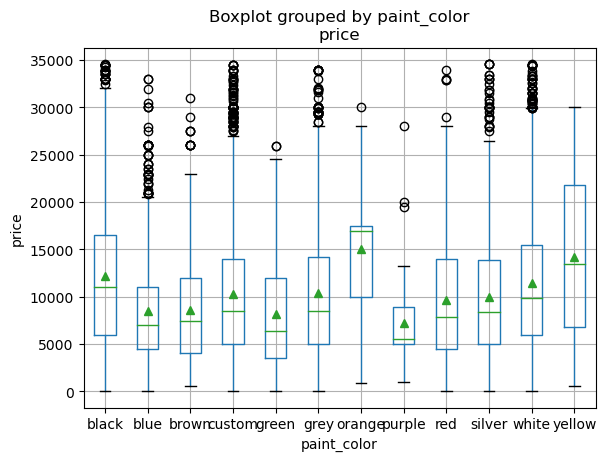

In [108]:
boxplot('SUV')

Untuk variabel kategorik **`transmission`** dan **`paint_color`** memiliki korelasi lemah terhadap **`price`** (harga).

**2. Korelasi variabel numerik kolom `vehicle_age`.**

nilai korelasi -0.5765594574584263


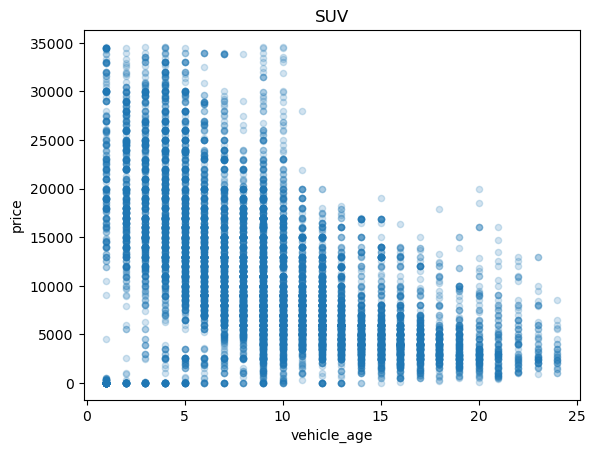

In [109]:
scatterplot('SUV','vehicle_age')

Pada umur kendaraan (`vehicle_age`) memiliki korelasi negatif terhadap harga (`price`)

**3. Korelasi variabel numerik kolom `odometer`.**

nilai korelasi -0.4858788164903


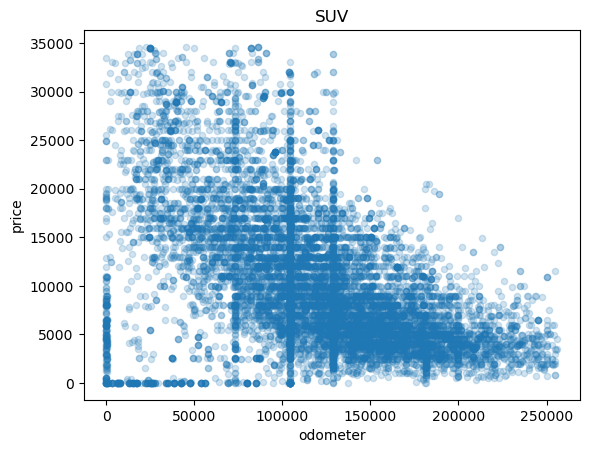

In [110]:
scatterplot('SUV','odometer')

Pada jarak tempuh kendaraan (`odometer`) memiliki korelasi negatif terhadap harga (`price`)

**4. Korelasi variabel numerik kolom `condition`.**

nilai korelasi 0.25981782587251934


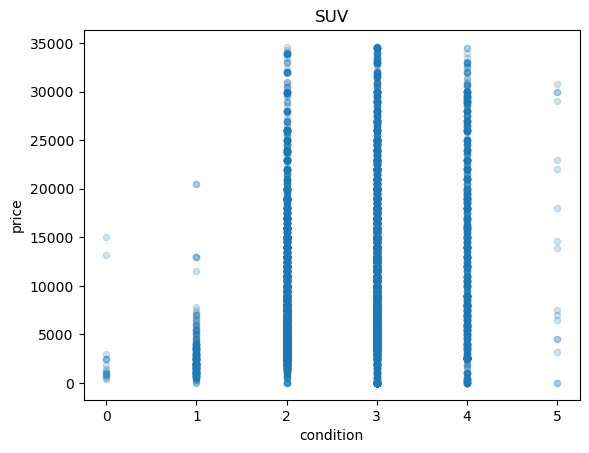

In [111]:
scatterplot('SUV','condition')

Pada kondisi kendaraan (`condition`) memiliki korelasi lemah positif terhadap harga (`price`)

**Ringkasan :**

Tipe kendaraan **sedan** :
 1. Variabel kategorik jenis transmisi (**transmission**) dan warna (**paint_color**) memiliki korelasi lemah terhadap harga (**price**).
 2. Umur kendaraan (**vehicle_age**) memiliki korelasi negatif terhadap harga (**price**)
 3. Jarak tempuh kendaraan (**odometer**) memiliki korelasi negatif terhadap harga (**price**)
 4. Kondisi kendaraan (**condition**) memiliki korelasi lemah positif terhadap harga (**price**).

Tipe kendaraan **SUV** :
 1. Variabel kategorik jenis transmisi (**transmission**) dan warna (**paint_color**) memiliki korelasi lemah terhadap harga (**price**).
 2. Umur kendaraan (**vehicle_age**) memiliki korelasi negatif terhadap harga (**price**)
 3. Jarak tempuh kendaraan (**odometer**) memiliki korelasi negatif terhadap harga (**price**)
 4. Kondisi kendaraan (**condition**) memiliki korelasi lemah positif terhadap harga (**price**). 


## Kesimpulan Umum

Pada dataset asli memiliki 51525 baris data dan tidak memiliki duplikat eksplisit.

Dilakukan perbaikan atas nilai yang hilang pada dataset :

 1. **model_year** : 7.02% Baris data nilai yang hilang di isi dengan nilai median tahun pembuatan per tipe kendaraan.
 2. **cylinders** : 10.21 % Baris data nilai yang hilang di isi dengan nilai median silinder per tipe kendaraan.
 3. **odometer** : 15.32% Baris data nilai yang hilang di isi dengan nilai median odometer per kondisi kendaran.
 4. **paint_color** : 18% Baris data nilai yang hilang di isi dengan warna custom.
 5. **is_4wd** : 50.37% Baris data nilai yang hilang di isi dengan nilai 0. 
 
Kemungkinan adanya nilai yang hilang pada kolom **model_year, cylinders, odometer, paint_color** karena tidak di isi oleh pengiklan kendaraan.

Terdapat kendaraan dengan jarak tempuh (**odometer**) 0, karena diisi oleh pengiklan dengan nilai tersebut.

Data pada kolom **is_4wd** merupakan penanda bahwa kendaraan tersebut memilki sistem penggerak 4 roda atau tidak. Pada kolom ini dilakukan perubahan tipe data menjadi boolean. 

Dilakukan perbaikan tipe data pada kolom **date_posted** dari object menjadi datetime.

Dilakukan perubahan nilai pada kolom **condition** sebagai berikut :

    0 = salvage
    1 = fair
    2 = good
    3 = excellent
    4 = like new
    5 = new

Setelah memeriksa parameter inti ditemukan beberapa parameter yang memiliki outlier :

 1. **price** terdapat rentang harga diatas 40000-100000.
 2. **vehicle_age** terdapat rentang umur diatas 40-100 tahun.
 3. **odometer** terdapat rentang jarak tempuh diatas 400000.

Outlier ini ditangani dengan memfilter data tanpa batas atas dan bawah outlier.
Jumlah baris data berubah menjadi 48039 baris atau 93% jumlah baris dari dataset asli.

Dari parameter inti dataset didapatkan informasi :

 1. Iklan paling banyak pada kendaraan dengan rentang harga (**price**) 5000-10000.
 2. Iklan paling banyak pada kendaraan dengan rentang umur (**vehicle_age**) 5 - 10 tahun.
 3. Iklan paling banyak pada kendaraan yang memiliki rentang jarak tempuh (**odometer**) 100000 - 150000.
 4. Iklan paling banyak pada kendaraan yang memiliki jumlah silinder (**cylinders**) 4, 6 dan 8.
 5. Iklan paling banyak pada kendarran yang dengan kondisi (**condition**) 2 dan 3.

Masa berlaku iklan pada dataset mempunyai rentang 0 - 271 hari.
Dengan rata rata lama iklan ditayangkan 40 hari dan median lama iklan ditayangkan 33 hari.
Sehingga diketahui iklan yang dihapus dengan cepat berada di bawah 40 hari dan iklan yang lama ditayangkan berada di atas 40 hari.

Dari data yang sudah di filter, terdapat 2 tipe kendaraan yang paling populer yaitu :

 1. **sedan** dengan harga rata rata 6997.
 2. **SUV** dengan harga rata rata 10590.

Untuk menjawab pertanyaan faktor apa yang mempengaruhi harga akan diambil dari sampel data 2 tipe kendaraan terpopuler.

Dari tipe kendaraan tersebut diketahui bahwa :

Tipe kendaraan **sedan** :
 1. Jenis transmisi (**transmission**) dan warna (**paint_color**) memiliki korelasi lemah terhadap harga (**price**).
 2. Umur kendaraan (**vehicle_age**) memiliki korelasi negatif terhadap harga (**price**)
 3. Jarak tempuh kendaraan (**odometer**) memiliki korelasi negatif terhadap harga (**price**)
 4. Kondisi kendaraan (**condition**) memiliki korelasi lemah positif terhadap harga (**price**).

Tipe kendaraan **SUV** :
 1. Jenis transmisi (**transmission**) dan warna (**paint_color**) memiliki korelasi lemah terhadap harga (**price**).
 2. Umur kendaraan (**vehicle_age**) memiliki korelasi negatif terhadap harga (**price**)
 3. Jarak tempuh kendaraan (**odometer**) memiliki korelasi negatif terhadap harga (**price**)
 4. Kondisi kendaraan (**condition**) memiliki korelasi lemah positif terhadap harga (**price**). 

Dari pengujian terhadap tipe kendaraan tersebut diketahui bahwa faktor yang paling mempengaruhi harga kendaraan (**price**) adalah umur kendaraan (**vehicle_age**) dan jarak tempuh kendaraan (**odometer**).
Hal ini menunjukkan bahwa semakin tinggi umur atau jarak tempuh kendaraan semakin rendah harga yang diiklankan.





Saran untuk Crankshaft List :
    
  1. Untuk parameter **model_year, odometer, cylinders, paint_color** harus di isi oleh pengguna untuk mempermudah analisa atas parameter tersebut.
  2. Penambahan kolom alasan iklan dihapus apakah karena kendaraan sudah terjual atau atas alasan lain. Hal ini dilakukan untuk melihat range harga atas kendaraan yang benar benar terjual.